* we are using MNIST dataset from scikit learn.
* there are 10 classes to classify.
* we can use logistic regression classifier for multi-class classification.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [6]:
fashion_mnist = pd.read_csv('datasets/fashion-mnist_train.csv')
fashion_mnist.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* label - the no corresponding to particular clothing accessory.
* 784 columns = pixel values 
* every image = 28 * 28
* each row is 1 image

In [7]:
fashion_mnist.shape

(60000, 785)

In [8]:
# taking frac of data to train

fashion_mnist = fashion_mnist.sample(frac=0.3).reset_index(drop=True)
fashion_mnist.shape

(18000, 785)

In [9]:
Lookup ={
    0 : 'T-shirt',
    1 : 'Trousers',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag', 
    9 : 'Ankle Boots'
}

In [10]:
def display_image(feature, actual_label):
    print('Actual label: ', Lookup[actual_label])
    plt.imshow(feature.reshape(28, 28))

In [11]:
X = fashion_mnist[fashion_mnist.columns[1:]]
Y = fashion_mnist['label']

In [12]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,6,1,...,0,0,2,0,0,52,64,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,20,77,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,39,0,0,0,0,0,0,0,0,0


In [13]:
Y.head()

0    2
1    7
2    0
3    7
4    1
Name: label, dtype: int64

In [14]:
X.loc[5].values[:100]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  97, 180,
         0,  56, 161, 138,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18,  60, 127,
       210, 240, 247, 251, 240, 217, 112,  48,  11,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 108, 112,
        90, 116, 157, 150, 131, 138, 127, 157,  90, 101, 131,  93,  11,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 131,
       120,  86,  93, 150,  75,  52,  52,  75,  26])

In [15]:
Y.loc[5]

6

Actual label:  Shirt


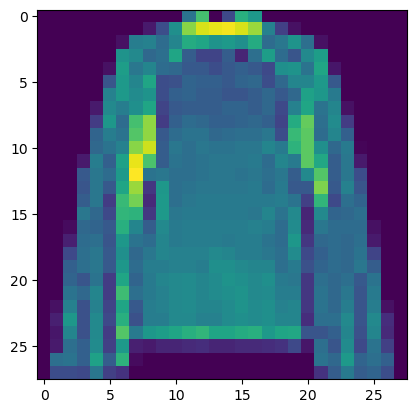

In [17]:
display_image(X.loc[5].values, Y.loc[5])

In [18]:
# scaling - between 0 - 1
X = X/255
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023529,0.003922,...,0.000000,0.000000,0.007843,0.0,0.0,0.203922,0.25098,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078431,0.301961,...,0.000000,0.003922,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.152941,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0


In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [22]:
x_train.shape, y_train.shape

((14400, 784), (14400,))

In [24]:
x_test.shape, y_test.shape

((3600, 784), (3600,))

In [26]:
def summary(y_test, y_pred, avg_method = 'weighted'):
    #This value will be between 0.0 and 1.0
    acc = accuracy_score(y_test, y_pred, normalize=True) 
    #The number of correctly predicted samples (raw count)
    acc_num = accuracy_score(y_test, y_pred, normalize=False) 

    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    #average = 'weighted' 
    # since this is a multi class classification we mention how to get the score.
    # it returns weighted average score of precision and recall for each label.
    # the weight depends on no of true instances of each label

    print(f'Test data count: {len(y_test)}')
    print(f'Accuracy_count: {acc_num}')
    print(f'Accuracy score: {acc}')
    print(f'Precision: {precision}')
    print(f'Recall : {recall}')
    print()

In [27]:
lr = LogisticRegression(solver='sag', multi_class='auto', max_iter=10000).fit(x_train, y_train)

In [28]:
y_pred = lr.predict(x_test)
y_pred

array([0, 5, 3, ..., 7, 6, 8])

In [29]:
summary(y_test, y_pred)

Test data count: 3600
Accuracy_count: 3035
Accuracy score: 0.8430555555555556
Precision: 0.8425815379906174
Recall : 0.8430555555555556

